In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv('walmart_stock_prices.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [3]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13233 non-null  object 
 1   Open          13233 non-null  float64
 2   High          13233 non-null  float64
 3   Low           13233 non-null  float64
 4   Close         13233 non-null  float64
 5   Volume        13233 non-null  int64  
 6   Dividends     13233 non-null  float64
 7   Stock Splits  13233 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 827.2+ KB


In [7]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13484\3509088338.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# Drop Date column (not a numerical feature)
df.drop(columns=['Date'], inplace=True)

In [9]:
# Select features and target variable
X = df.drop(columns=['Close'])  # Predicting Close price
y = df['Close']

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

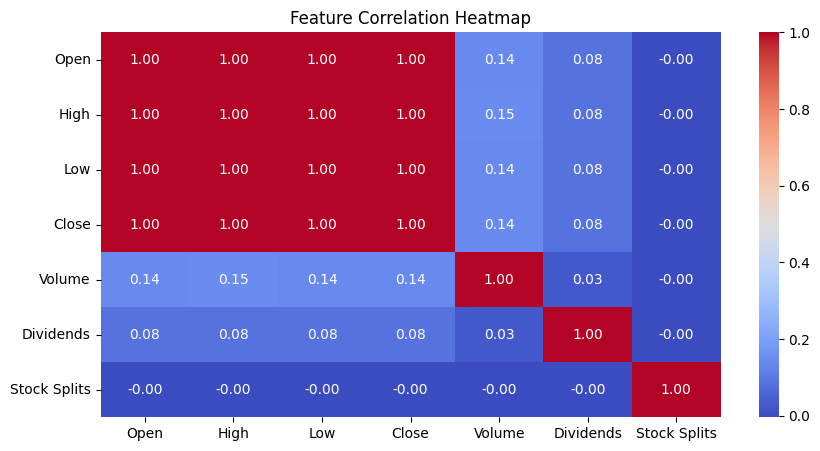

In [12]:
# --- Visualization ---
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

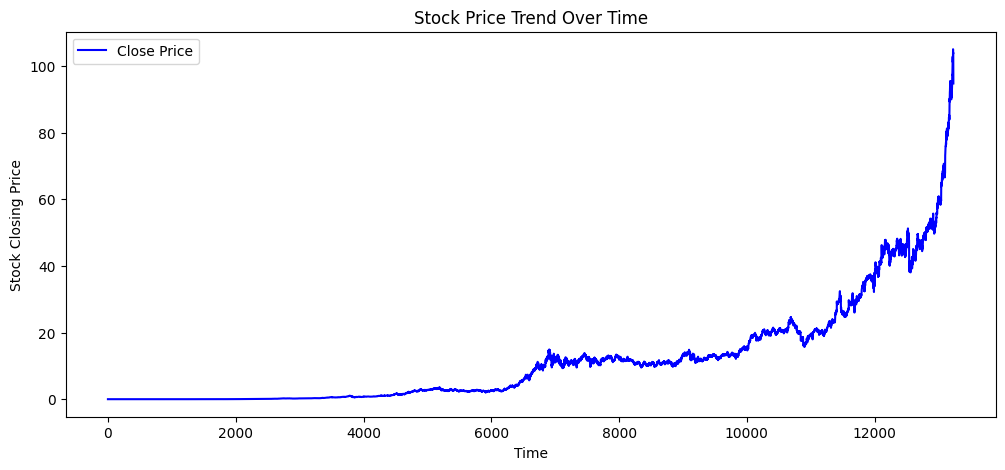

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Stock Price Trend Over Time")
plt.legend()
plt.show()

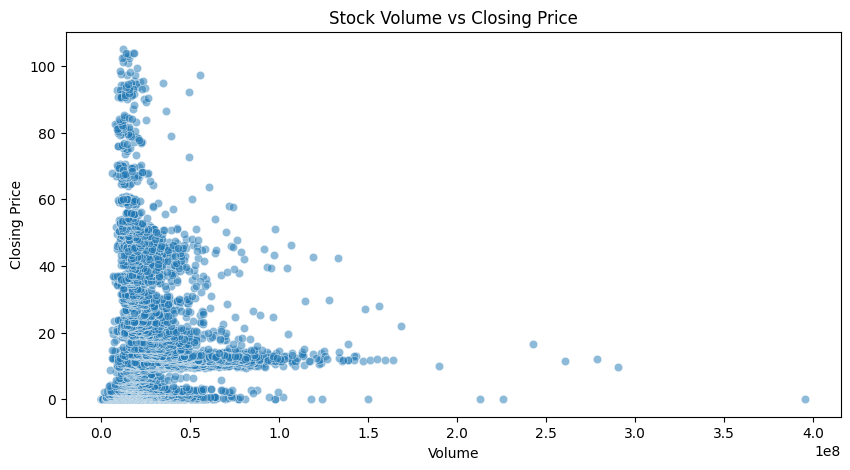

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.title("Stock Volume vs Closing Price")
plt.show()

In [15]:
# --- Regression Models ---
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Machine': SVR(kernel='rbf'),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

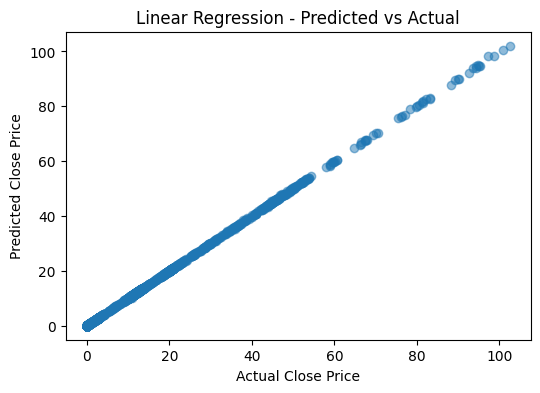

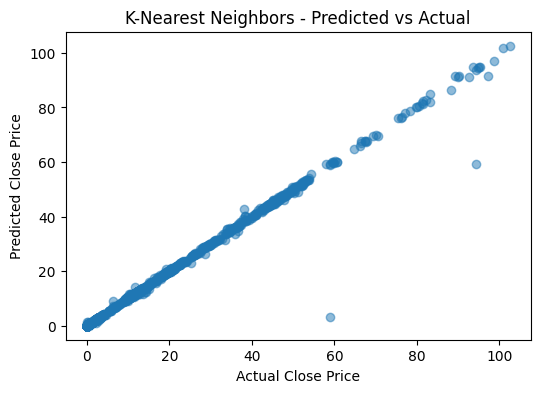

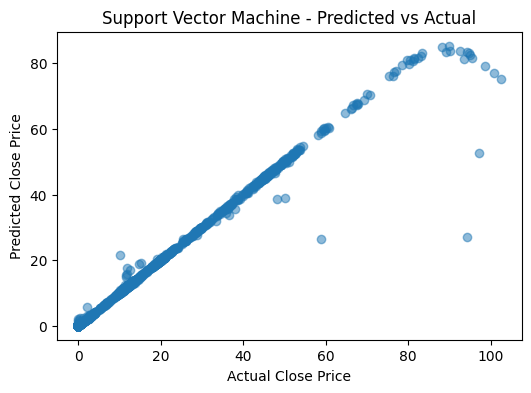

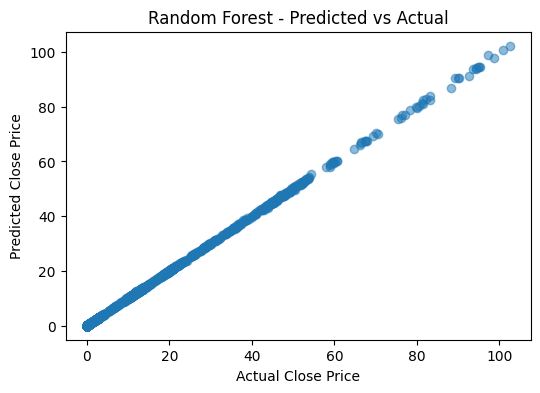

In [17]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2 Score': r2, 'MSE': mse}
    
    # Plot Predicted vs Actual
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Close Price")
    plt.ylabel("Predicted Close Price")
    plt.title(f"{name} - Predicted vs Actual")
    plt.show()

In [18]:
# Print results
for model, metrics in results.items():
    print(f"{model}: R2 Score = {metrics['R2 Score']:.4f}, MSE = {metrics['MSE']:.4f}")

Linear Regression: R2 Score = 1.0000, MSE = 0.0085
K-Nearest Neighbors: R2 Score = 0.9931, MSE = 1.7328
Support Vector Machine: R2 Score = 0.9838, MSE = 4.0579
Random Forest: R2 Score = 0.9999, MSE = 0.0171


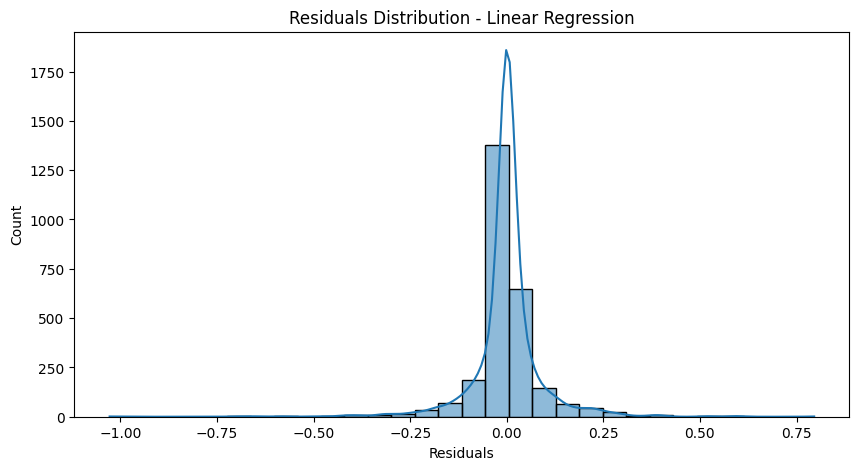

In [19]:
# Residual Plot
residuals = y_test - models['Linear Regression'].predict(X_test_scaled)
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution - Linear Regression")
plt.show()